In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
%matplotlib inline

In [2]:
# Считает джини фактора или предсказаний
def gini(y_true, y_score):
    roc_score = roc_auc_score(y_true, y_score)
    return roc_score*2 - 1

def gini_scorrer(clf, X, y):
    y_score= [p[1] for p in clf.predict_proba(X)]
    return gini(y, y_score)


def get_factors_gini(data, target):
    factors_gini = list()
    for c in data.columns:
        g = gini(data[target], data[c])
        factors_gini.append([c,g])
    factors_gini = sorted(factors_gini, key = lambda x: x[1])
    return factors_gini

def get_base_line_score(data, target):
    rf = RandomForestClassifier()
    cv_score = cross_val_score(rf, X = data.drop([target], axis=1), y=data[target], scoring=gini_scorrer, cv=3)
    return cv_score

def get_feature_importance(data, target):
    rf = RandomForestClassifier()
    rf.fit(X = data.drop([target], axis=1), y= data[target])
    return sorted([[v,i] for v,i in zip(data.drop([target], axis=1).columns, rf.feature_importances_)], key=lambda x: x[1], reverse=True)

def show_corr(data, th=None):
    if th:
        sns.heatmap(data.corr()>th)
    else:
        sns.heatmap(data.corr())
    
# Вычисление VIF
def vif(data):
    """
    Calculate VIFs
    :param data: Data
    :return: List of VIFs for each variable in format: Variable - VIF
    """
    res = list()
    for i in range(data.shape[1]):
        res.append([data.columns[i], variance_inflation_factor(data.as_matrix(), i)])
    return res

def rocs(y_true, y_pred, colors, names, name=''):
    ''' Plot several ROC curves

     Keyword arguments:
     y_true -- array of true values arrays
     y_pred -- array of predicted values arrays
     colors -- array of colors for curves
     names -- array of names for curves
     name -- name of graph (default empty string)
     '''
    if (len(y_true) != len(y_pred)) or (len(y_true) != len(colors)):
        print(len(y_true), len(y_pred), len(colors))
        raise BaseException
    plt.figure(figsize=[10, 10])
    ginis = []

    for i in range(0, len(y_true)):
        fpr, tpr, _ = roc_curve(y_true=y_true[i], y_score=y_pred[i], pos_label=None)
        gini_value = gini(y_true=y_true[i], y_score=y_pred[i])
        ginis.append(gini_value)
        plt.plot(fpr, tpr, color=colors[i], label=names[i] + ' (Gini = %0.4f)' % gini_value)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic ' + name)
    plt.legend(loc="lower right")
    plt.show()

def pr_curves(y_true, y_pred, colors, names, name=''):
    ''' Plot several PR curves
     Keyword arguments:
     y_true -- array of true values arrays
     y_pred -- array of predicted values arrays
     colors -- array of colors for curves
     names -- array of names for curves
     name -- name of graph (default empty string)
     '''
    plt.figure(figsize=[10, 10])

    for i in range(0, len(y_true)):
        precision, recall, thresholds = precision_recall_curve(y_true=y_true[i], probas_pred=y_pred[i])
        avg = average_precision_score(y_true[i], y_pred[i])
        plt.plot(recall, precision, lw=1.5, color=colors[i], label=names[i] + ' AUC={0:0.4f}'.format(avg))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc="upper right")
    plt.show()


In [3]:
rename_dict = {0: 'prescreaning', 
 1:'MA1', 2:'MA2', 3:'MA3', 4:'MA4', 5:'MA5', 6:'MA6',
 7:'MAN1', 8:'MAN2', 9:'MAN3', 10:'MAN4', 11:'MAN5', 12:'MAN6', 13:'MAN7', 14:'MAN8',
 15: 'ED', 16: 'D', 17: 'AMFM', 18: 'label'
}

In [4]:
retinopathy = pd.read_excel('retinopathy.xlsx', sheet_name=1, header=None)
data = retinopathy.rename(rename_dict, axis=1)

In [5]:
len(data.columns)

19

# Base line

In [6]:
get_base_line_score(data, 'label')

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.42545733, 0.43578158, 0.41600708])

In [7]:
get_feature_importance(data, 'label')

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[['MA1', 0.09779023323734454],
 ['MAN1', 0.09035458154793066],
 ['MAN3', 0.07979423015860702],
 ['ED', 0.0719682894638727],
 ['MAN2', 0.06931311572511288],
 ['D', 0.06383256044214967],
 ['MAN4', 0.062322423193816597],
 ['MAN7', 0.06179950175953459],
 ['MA3', 0.05693749767958459],
 ['MA2', 0.05652083100143793],
 ['MAN5', 0.05445902180296812],
 ['MA6', 0.053522623823726884],
 ['MA5', 0.04684100424418835],
 ['MA4', 0.04508688549940245],
 ['MAN6', 0.04391757534699079],
 ['MAN8', 0.03131866020755311],
 ['AMFM', 0.008157684571393584],
 ['prescreaning', 0.006063280294385651]]

# Анализ переменных
## Распределение

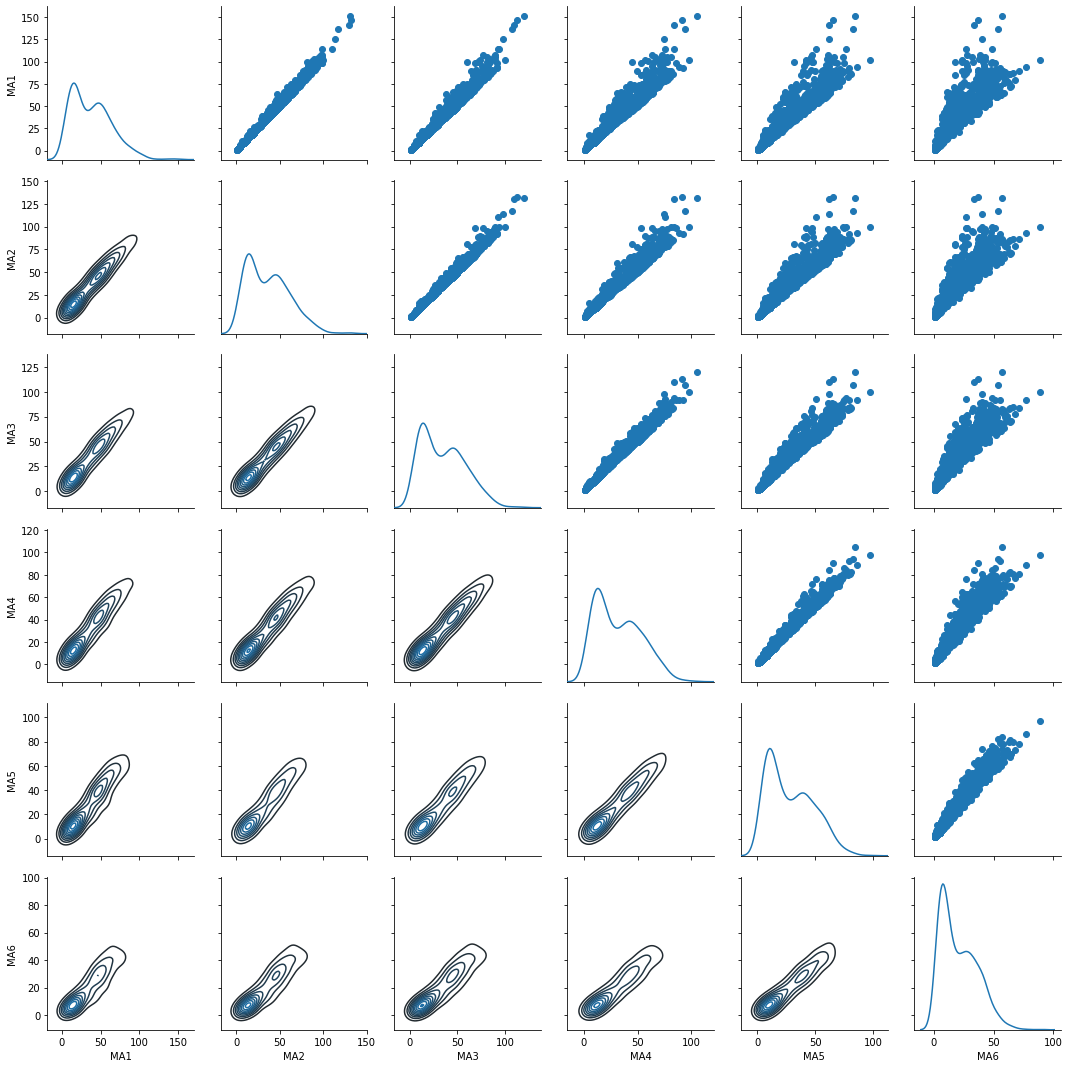

In [8]:
g = sns.PairGrid(data[['MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6']])
g.map_diag(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

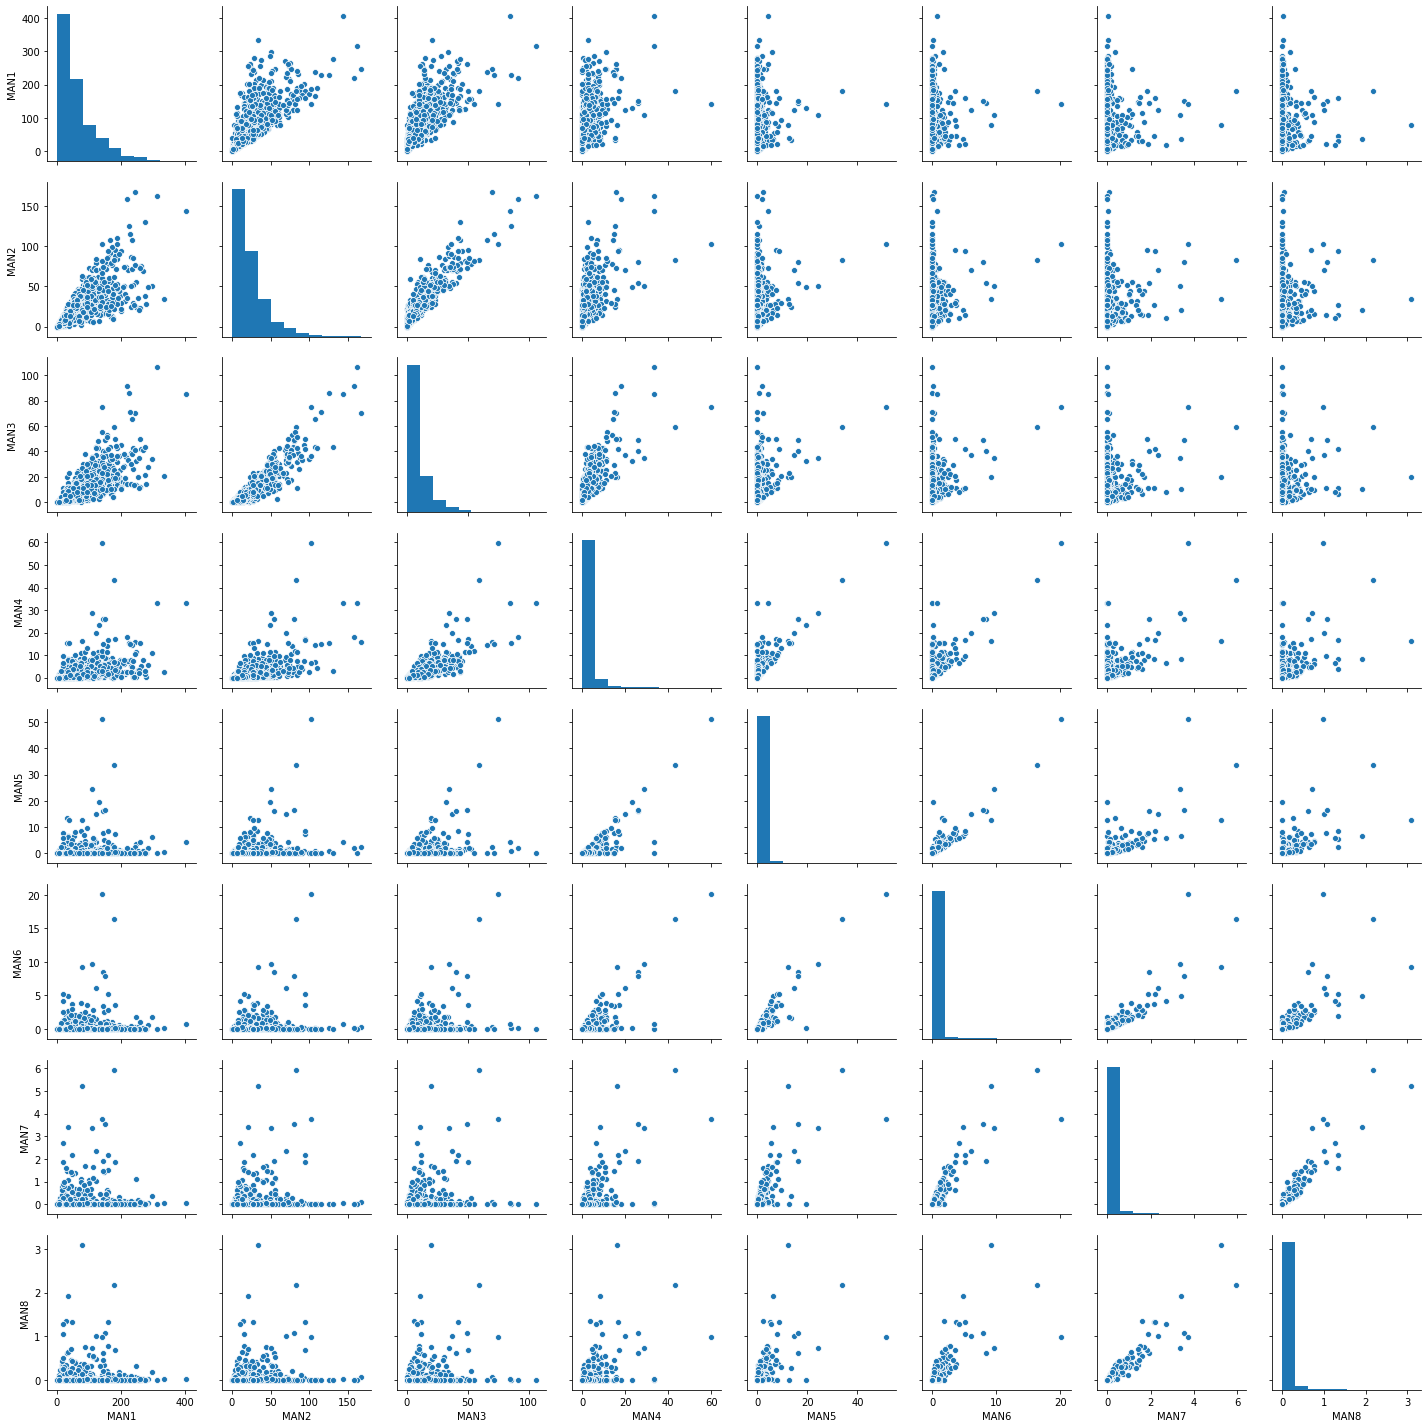

In [9]:
sns.pairplot(data[['MAN1', 'MAN2', 'MAN3', 'MAN4', 'MAN5', 'MAN6', 'MAN7', 'MAN8']])

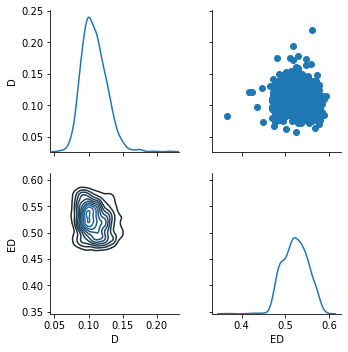

In [10]:
g2 = sns.PairGrid(data[['D', 'ED']])
g2.map_diag(sns.kdeplot)
g2.map_upper(plt.scatter)
g2.map_lower(sns.kdeplot)

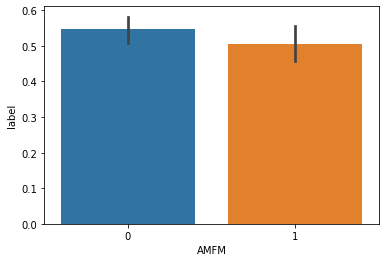

In [11]:
# Бинарные переменные
sns.barplot(x='AMFM', y = 'label', data=data)

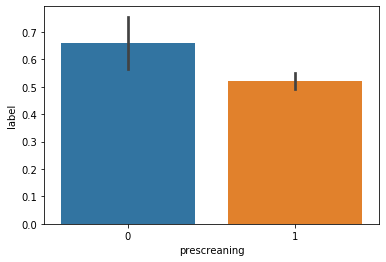

In [12]:
sns.barplot(x='prescreaning', y = 'label', data=data)

In [13]:
original_features = data.columns.values[:-1]

## Анализ корреляций

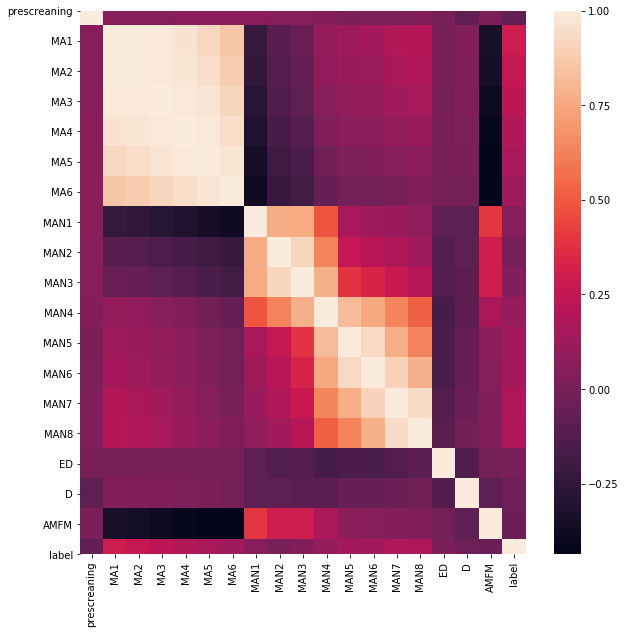

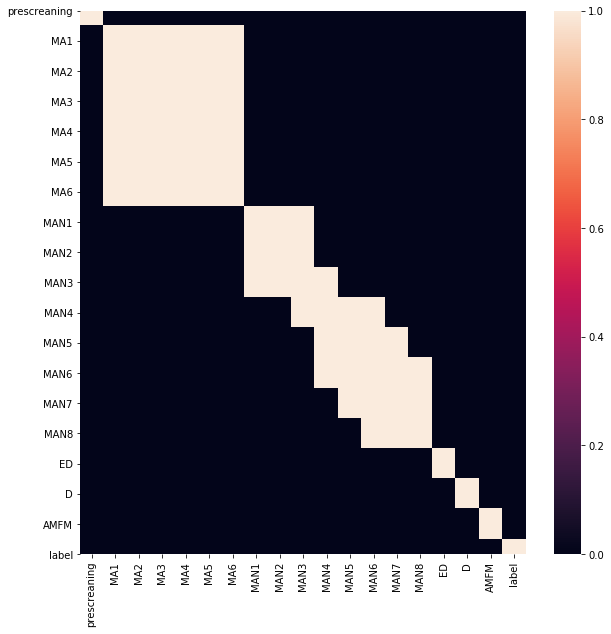

In [14]:
corrs = data.corr()
plt.figure(figsize=[10,10])
sns.heatmap(corrs)

plt.figure(figsize=[10,10])
sns.heatmap(corrs>0.7)

# Новые фичи

In [15]:
#хочется логарифмировать всё кроме бинарных признаков и ED, D
to_be_logged = ['MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6', 'MAN1',
       'MAN2', 'MAN3', 'MAN4', 'MAN5', 'MAN6', 'MAN7', 'MAN8']
logged = ['{}_log'.format(c) for c in to_be_logged]

for c in to_be_logged:
    data['{}_log'.format(c)] = np.log1p(data[c])

In [16]:
# и попробуем ещё все отношения
from itertools import combinations

feature_comb = list(combinations(original_features,2))

for fc in feature_comb:
    data['{}/{}'.format(fc[0],fc[1])] = data[fc[0]]/data[fc[1]]
    #data['{}/{}'.format(fc[1],fc[0])] = data[fc[1]]/data[fc[0]]

In [17]:
# и произведения
for fc in feature_comb:
    data['{}*{}'.format(fc[0],fc[1])] = data[fc[0]]*data[fc[1]]
    #data['{}/{}'.format(fc[1],fc[0])] = data[fc[1]]/data[fc[0]]

In [18]:
data.replace(np.inf, np.nan, inplace=True)
clear_data = data.dropna(axis=1)

## Baseline с новыми фичами

In [19]:
get_base_line_score(clear_data, 'label')

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.58771497, 0.67740169, 0.60372502])

In [20]:
all_features_importance = get_feature_importance(clear_data, 'label')
all_features_importance

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[['MA1/MA4', 0.049952959886061],
 ['MA2/MA5', 0.03273264750998842],
 ['MA1/MA2', 0.030081499726302044],
 ['MA1/MA5', 0.022567645371666435],
 ['MA1/MA6', 0.021722094200252753],
 ['MA2/MA3', 0.019537204629132277],
 ['MA3/MAN2', 0.016339227246049453],
 ['MA1/MA3', 0.01628065098841038],
 ['MAN2/ED', 0.015016061439372487],
 ['MA1/ED', 0.011928450865147853],
 ['MAN1*MAN2', 0.01191084447754487],
 ['MA2_log', 0.011247071652947832],
 ['MA4*MAN5', 0.010743794262228963],
 ['MA5*MAN8', 0.010717676303594707],
 ['MA4/MA6', 0.010517307183814589],
 ['prescreaning*MA3', 0.009356915650035772],
 ['MA2*MA3', 0.009328258125417375],
 ['MA3/MA6', 0.008869582140065743],
 ['MA3*MAN8', 0.008777622439766129],
 ['MA6*MAN8', 0.00874901341940321],
 ['MA4*MAN2', 0.008205859390807459],
 ['prescreaning/MA2', 0.007859256045432668],
 ['MA4/MA5', 0.007700698607730567],
 ['MAN8/D', 0.007500990395022147],
 ['MAN1_log', 0.007418523674379934],
 ['MA1/MAN2', 0.00732253853507009],
 ['MA2/MA6', 0.0072303758560842545],
 ['MA1*MA

# Однофакторный анализ

In [21]:
new_features_gini = get_factors_gini(clear_data, 'label')
new_features_gini_df = pd.DataFrame(new_features_gini, columns=['variable', 'gini'])
new_features_gini_df['gini_abs'] = new_features_gini_df['gini'].abs()
new_features_gini_df.sort_values('gini_abs', ascending=False, inplace=True)

In [22]:
new_features_gini_df.iloc[:40]

,variable,gini,gini_abs
252,label,1.000000,1.000000
251,MA1/MA3,0.577363,0.577363
250,MA1/MA4,0.559989,0.559989
249,MA1/MA2,0.520602,0.520602
248,MA2/MA4,0.467615,0.467615
247,MA1/MA5,0.454296,0.454296
246,MA2/MA3,0.437529,0.437529
245,MA2/MA5,0.382924,0.382924
244,MA3/MA4,0.377559,0.377559
243,MA1/MA6,0.376933,0.376933


## значимость

In [23]:
all_features = set(data.columns) - {'label'}

In [24]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

one_dim_models_res = []
for feature_name in all_features:
    model = smf.logit(f'label ~ {feature_name}', data).fit()
    model.summary()
    one_dim_models_res.append({
        'feature': feature_name,
        'AIC': model.aic,
        'LLR': model.llr,
        'LLR_pval': model.llr_pvalue
    })

one_dim_models_res = pd.DataFrame(one_dim_models_res).set_index('feature')

Optimization terminated successfully.
         Current function value: 0.635241
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.618848
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.658119
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.665909
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.646788
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.644474
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.646515
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.653161
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.682591
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.671504

         Iterations 6
Optimization terminated successfully.
         Current function value: 0.645508
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.674914
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.689145
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.688039
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.622772
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.654460
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.688061
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.647660
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.655068
         Iterations 13
Optimization terminated successfully.
         Current fu

         Iterations 11
Optimization terminated successfully.
         Current function value: 0.662779
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.657355
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.646300
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.629519
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.649921
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.656145
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.684264
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.682904
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.540655
         Iterations 8
Optimization terminated successfully.
         Current fu

Optimization terminated successfully.
         Current function value: 0.682949
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.652598
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.641219
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.681645
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.641430
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.604896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.687636
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.664819
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.690369
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.679491
 

In [25]:
def get_significance(pval):
    if pval < 0.001:
        return '***'
    elif pval < 0.01:
        return '**'
    elif pval < 0.05:
        return '*'
    elif pval < 0.1:
        return '.'
    else:
        return ''
      
one_dim_models_res['significance'] =  one_dim_models_res['LLR_pval'].apply(get_significance)       

In [26]:
one_dim_models_res[one_dim_models_res['significance'] == '***'].shape

(282, 4)

In [27]:
one_dim_models_res.loc[one_dim_models_res['significance'] == '***'].sort_values(by='LLR_pval').head(40)

,AIC,LLR,LLR_pval,significance
feature,,,,
MA1*MA3,1178.898954,414.273080,1.792138e-89,***
MA1*MA4,1218.432787,374.739247,6.551871e-81,***
MA1*MA2,1248.262139,344.909895,1.887185e-74,***
MA1*MA5,1281.724492,311.447542,3.311661e-67,***
MA2*MA4,1309.669649,283.502385,3.698124e-61,***
MA2*MA3,1311.053141,282.118893,7.367977e-61,***
MA2*MA5,1346.056044,247.115991,2.751578e-53,***
MA1*MA6,1365.792001,227.380033,5.096439e-49,***
MA3*MA4,1395.630717,197.541317,1.433504e-42,***


# Регрессия

In [28]:
def test_model(train, test, model):
    rocs(y_true = [train['label'], test['label']], 
     y_pred = [fitted_model.predict(sm.add_constant(train[predictors])), fitted_model.predict(sm.add_constant(test[predictors]))],
     colors = ['blue', 'red'], 
     names = ['train', 'test'], name='')
    print('Train gini:', gini(train['label'], fitted_model.predict(sm.add_constant(train[predictors]))))
    print('Test gini:', gini(test['label'], fitted_model.predict(sm.add_constant(test[predictors]))))
    print(fitted_model.summary())
    show_corr(clear_data[predictors])
    vif_df = pd.DataFrame(vif(clear_data[predictors]), columns=['variable', 'vif'])
    print(vif_df.head(10))

In [29]:
train, test = train_test_split(clear_data, test_size=0.3, stratify = clear_data['label'], random_state=42)

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.556833
         Iterations 7


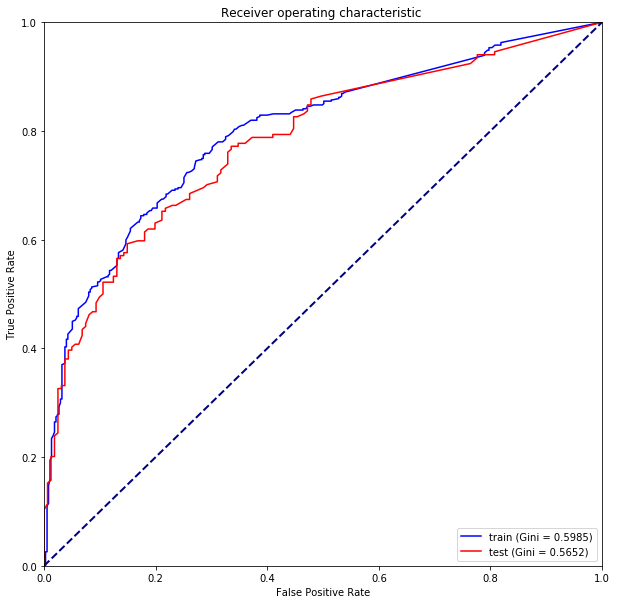

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Train gini: 0.5984699453551914
Test gini: 0.5651836348906294
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  802
Model:                          Logit   Df Residuals:                      799
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Jan 2020   Pseudo R-squ.:                  0.1942
Time:                        13:27:33   Log-Likelihood:                -446.58
converged:                       True   LL-Null:                       -554.22
Covariance Type:            nonrobust   LLR p-value:                 1.795e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.9697      1.384    -10.819      0.000     -17.682     -12.258
MA1/MA3       14.2637      1.315     10.848      0.000      11.686    

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


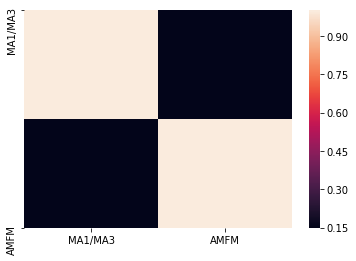

In [30]:
predictors = ['MA1/MA3', 'AMFM']
#predictors = ['MA1/MA4', 'MA1*ED']

model = sm.Logit(train['label'], sm.add_constant(train[predictors]))
fitted_model = model.fit()
test_model(train, test, fitted_model)

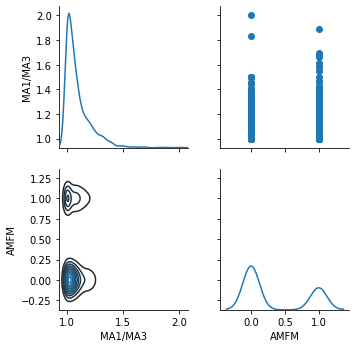

In [31]:
g3 = sns.PairGrid(clear_data[predictors])
g3.map_diag(sns.kdeplot)
g3.map_upper(plt.scatter)
g3.map_lower(sns.kdeplot)

# Влияние выбросов

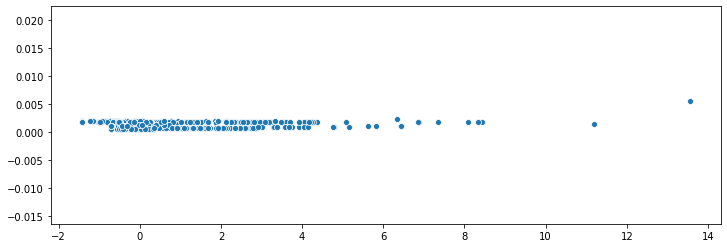

In [32]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

final_features = np.array(train[predictors])
cooks_model = GLM(train['label'], final_features, family=families.Binomial()).fit()

infl = cooks_model.get_influence()
plt.figure(figsize=(12, 4))
sns.scatterplot(fitted_model.fittedvalues, infl.cooks_distance[0])

Fitting on 801 / 802 of samples
Optimization terminated successfully.
         Current function value: 0.539564
         Iterations 7


c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


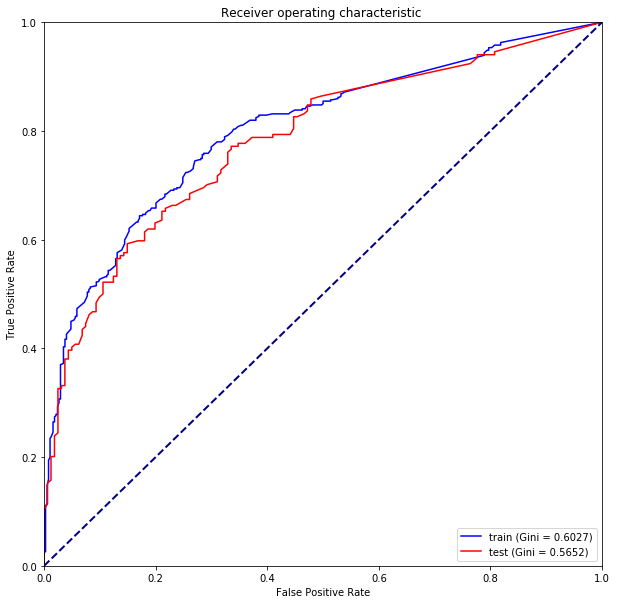

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Train gini: 0.6027439291663015
Test gini: 0.5651836348906294
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  802
Model:                          Logit   Df Residuals:                      799
Method:                           MLE   Df Model:                            2
Date:                Fri, 03 Jan 2020   Pseudo R-squ.:                  0.1942
Time:                        13:31:14   Log-Likelihood:                -446.58
converged:                       True   LL-Null:                       -554.22
Covariance Type:            nonrobust   LLR p-value:                 1.795e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.9697      1.384    -10.819      0.000     -17.682     -12.258
MA1/MA3       14.2637      1.315     10.848      0.000      11.686    

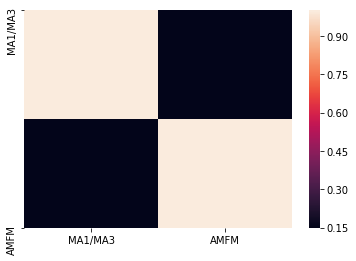

In [40]:
new_train = train[infl.cooks_distance[0] < 0.005]
print('Fitting on {} / {} of samples'.format(len(new_train), len(train)))
model_cooks = sm.Logit(new_train['label'], sm.add_constant(new_train[predictors])).fit()
test_model(new_train, test, model_cooks)


Выбросы не оказывают большого влияния, удалять их не будем

# Оценка качества модели

In [34]:
test_scores = fitted_model.predict(sm.add_constant(test[predictors]))
train_scores = fitted_model.predict(sm.add_constant(train[predictors]))

c:\users\xiaomi\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Разделяющая способность

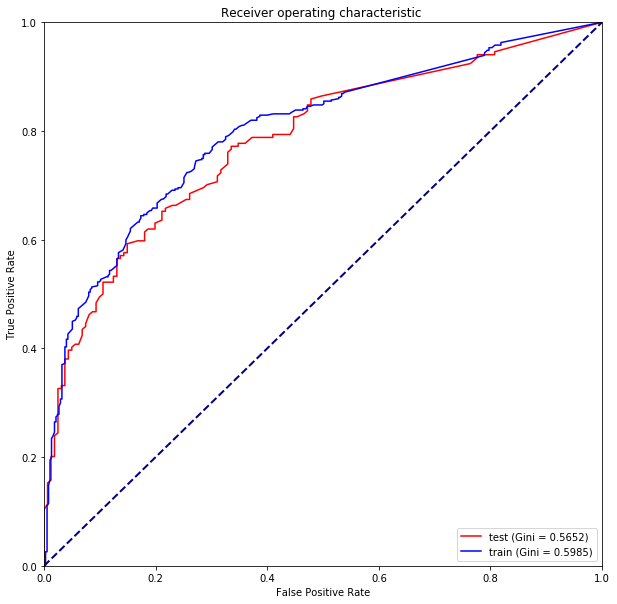

In [35]:
rocs(y_true=[test['label'], train['label']], y_pred=[test_scores, train_scores],
    colors=['red', 'blue'], names=['test', 'train'])

## Средняя точность (PR-кривая)

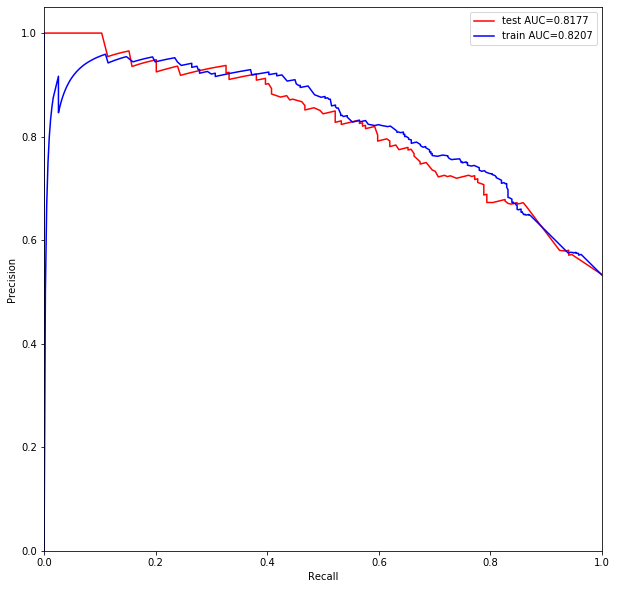

In [36]:
pr_curves(y_true=[test['label'], train['label']], y_pred=[test_scores, train_scores],
    colors=['red', 'blue'], names=['test', 'train'])

## Чувствительность и специфичность

Text(0.5, 0, 'Cutoffs')

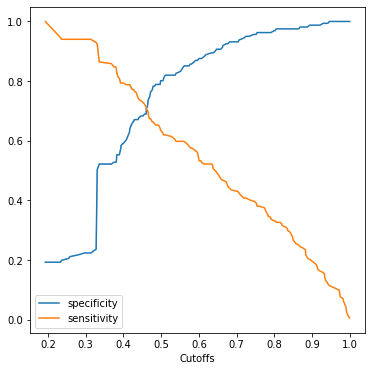

In [37]:
n1 = test['label'].sum()
n = len(test['label'])

sensitivity = np.zeros_like(test_scores)
specificity = np.zeros_like(test_scores)
for j, u in enumerate(sorted(test_scores)):
    sensitivity[j] = np.sum((test_scores >= u) * test['label']) / float(n1)
    specificity[j] = np.sum((test_scores <= u) * (1 - test['label'])) / float(n - n1)

plt.figure(figsize=(6, 6))
sns.lineplot(sorted(test_scores), specificity, label='specificity',)
sns.lineplot(sorted(test_scores), sensitivity, label='sensitivity')
plt.xlabel('Cutoffs')

## Порог отсечения

In [38]:
sorted_scores = sorted(test_scores)
idx = np.nonzero(np.array(sorted_scores) >= 0.45)[0][0]
print('For cutoff {:.4f}: specificity={:.4f}, sensitivity={:.5f}'.format(
    sorted_scores[idx], specificity[idx], sensitivity[idx]
))

For cutoff 0.4522: specificity=0.6832, sensitivity=0.72826


# Выводы и интерпретация

In [39]:
confint_results = np.exp(pd.concat((fitted_model.params, fitted_model.conf_int()), axis=1))
confint_results.columns = ['coef', 'confint_2.5', 'confint_97.5']
confint_results

,coef,confint_2.5,confint_97.5
const,3.153142e-07,2.094216e-08,4.747507e-06
MA1/MA3,1.565492e+06,1.189549e+05,2.060247e+07
AMFM,4.836963e-01,3.375911e-01,6.930339e-01


#### В логистической регрессии
Вероятность наступления события зависит от z: $p = \frac{1}{1+e^{-z}}$, где $z = a_0 + a_1*x_1+...+a_n*x_n$
<br>Шанс наступления события зависит от z: $\frac{p}{1-p} = e^z = e^{a_0 + a_1*x_1+...+a_n*x_n}$
<br>Таким образом, коэффициент регрессии $a_i$ показывает, что при увеличении значения объясняющей переменной на 1, шанс наступления события увеличивается в $e^{a_i}$ раз 
<br>
#### Интерпретация модели
Разберём значения коэффициентов в полученной модели.
Переменные вошедшие в модель: 
- MA1/MA4 - отношение количества MA, найденных на уровне p-value 0.5, к количеству MA, найденных на уровне p-value 0.7
- MA1*ED - результат AM/FM классификации
<br>
Видим, что:
- увеличение MA1/MA3 на 1 приводит к увеличению шанса возникновения целевого события в $e^{14.2637} = 1565475.23$ раз
- положительный (1) результат AM/FM классификации приводит к уменьшению шанса возникновения целевого события в $e^{0.7263} = 2.07$ раз